# Name - Dhrupad Kumar Das

# Batch - 10

# Recommendation System Content Based)

## c)	Use the Anime Recommendations dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab.

## https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data

## Code for reference - https://www.kaggle.com/code/benroshan/content-collaborative-anime-recommendation


## i.	Download the dataset from above link and load it into your Python environment.
## ii.	Perform the EDA and do the visualizations.
## iii.	Check the distributions/skewness in the variables and do the transformations if required.
## iv.	Create a content based Recommender system 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [5]:
anime_df = pd.read_csv("D:/Data_science/Unsupervised Machine Learning/Assignment/Recommendation_Assignment/anime.csv")
rating_df = pd.read_csv("D:/Data_science/Unsupervised Machine Learning/Assignment/Recommendation_Assignment/rating.csv")

In [6]:
print(f'The shape of the data is (row,column): {anime_df.shape}')
print(anime_df.info())

The shape of the data is (row,column): (12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [7]:
anime_df.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [8]:
anime_df.tail()

anime_id                                               name   genre  \
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami  Hentai   
12290      5543                                        Under World  Hentai   
12291      5621                     Violence Gekiga David no Hoshi  Hentai   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...  Hentai   
12293     26081                   Yasuji no Pornorama: Yacchimae!!  Hentai   

        type episodes  rating  members  
12289    OVA        1    4.15      211  
12290    OVA        1    4.28      183  
12291    OVA        4    4.88      219  
12292    OVA        1    4.98      175  
12293  Movie        1    5.46      142

In [18]:
print(f'The shape of the data is (row, column): {rating_df.shape}')
print(rating_df.info())

The shape of the data is (row, column): (7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [19]:
rating_df.head()

user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1

In [20]:
rating_df.tail()

user_id  anime_id  rating
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

In [13]:
anime_full_dataset = pd.merge(anime_df, rating_df, on = 'anime_id', suffixes = ['', '_user'])

In [14]:
anime_full_dataset = anime_full_dataset.rename(columns = {'name' : 'anime_title', 'rating_user': 'user_rating'})
anime_full_dataset.head()

anime_id     anime_title                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  
0        1    9.37   200630       99            5  
1        1    9.37   200630      152           10  
2        1    9.37   200630      244           10  
3        1    9.37   200630      271           10  
4        1    9.37   200630      278           -1

# Top 10 Anime based on rating counts

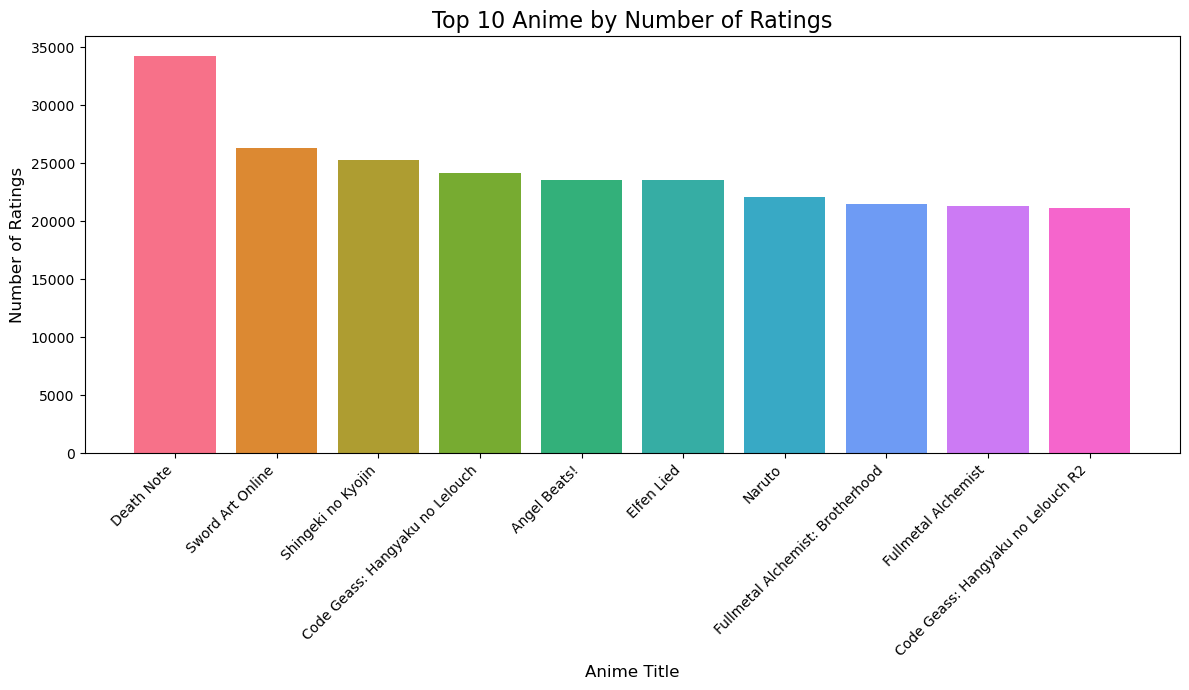

In [18]:
# Step 1: Filter out ratings with -1
valid_ratings = anime_full_dataset[anime_full_dataset['user_rating'] != -1]

# Step 2: Count number of valid ratings per anime
rating_counts = valid_ratings.groupby('anime_title')['user_rating'].count()

# Step 3: Sort and get top 10
top_10_anime = rating_counts.sort_values(ascending=False).head(10)

# Step 4: Plot vertical bar chart with different colors
plt.figure(figsize=(12, 7))
colors = sns.color_palette('husl', len(top_10_anime))  # distinct colors

plt.bar(top_10_anime.index, top_10_anime.values, color=colors)

# Formatting
plt.title('Top 10 Anime by Number of Ratings', fontsize=16)
plt.xlabel('Anime Title', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Anime based on Community size

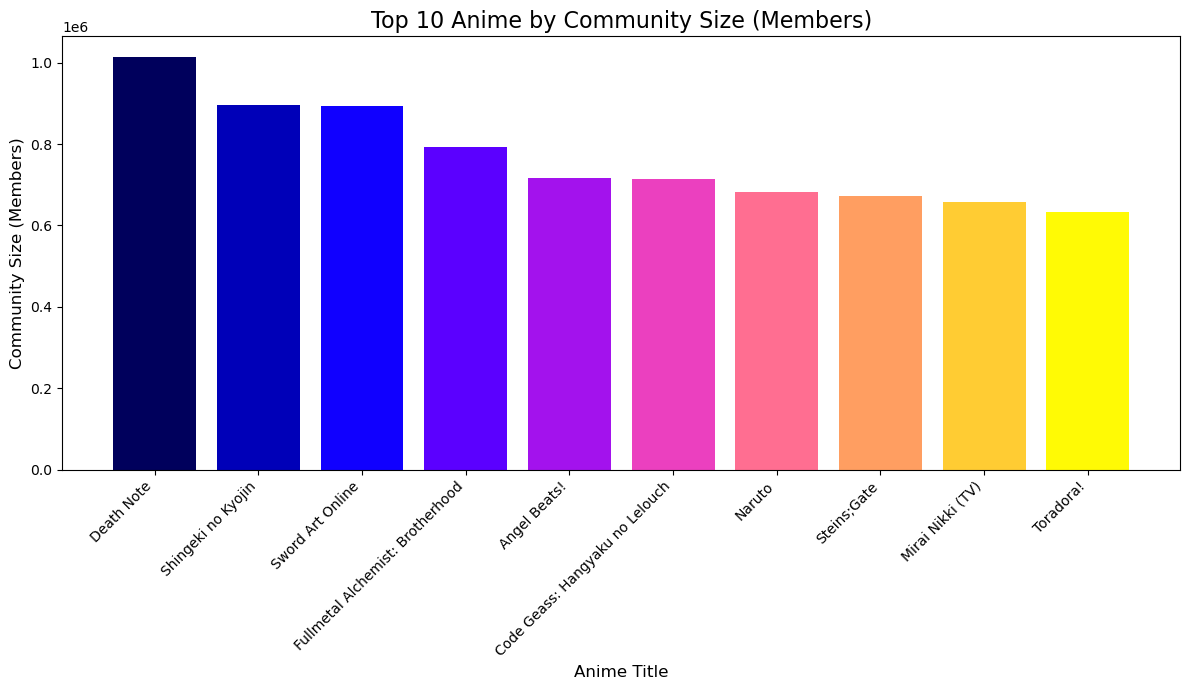

In [20]:
# Step 1: Drop duplicates to avoid multiple user ratings for the same anime
unique_anime = anime_full_dataset[['anime_title', 'members']].drop_duplicates()

# Step 2: Get top 10 by community size
top_10_community = unique_anime.sort_values(by='members', ascending=False).head(10)

# Step 3: Plot vertical bar chart with distinct colors
plt.figure(figsize=(12, 7))
colors = sns.color_palette('gnuplot2', len(top_10_community))  # distinct palette

plt.bar(top_10_community['anime_title'], top_10_community['members'], color=colors)

# Formatting
plt.title('Top 10 Anime by Community Size (Members)', fontsize=16)
plt.xlabel('Anime Title', fontsize=12)
plt.ylabel('Community Size (Members)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Distribution of ratings

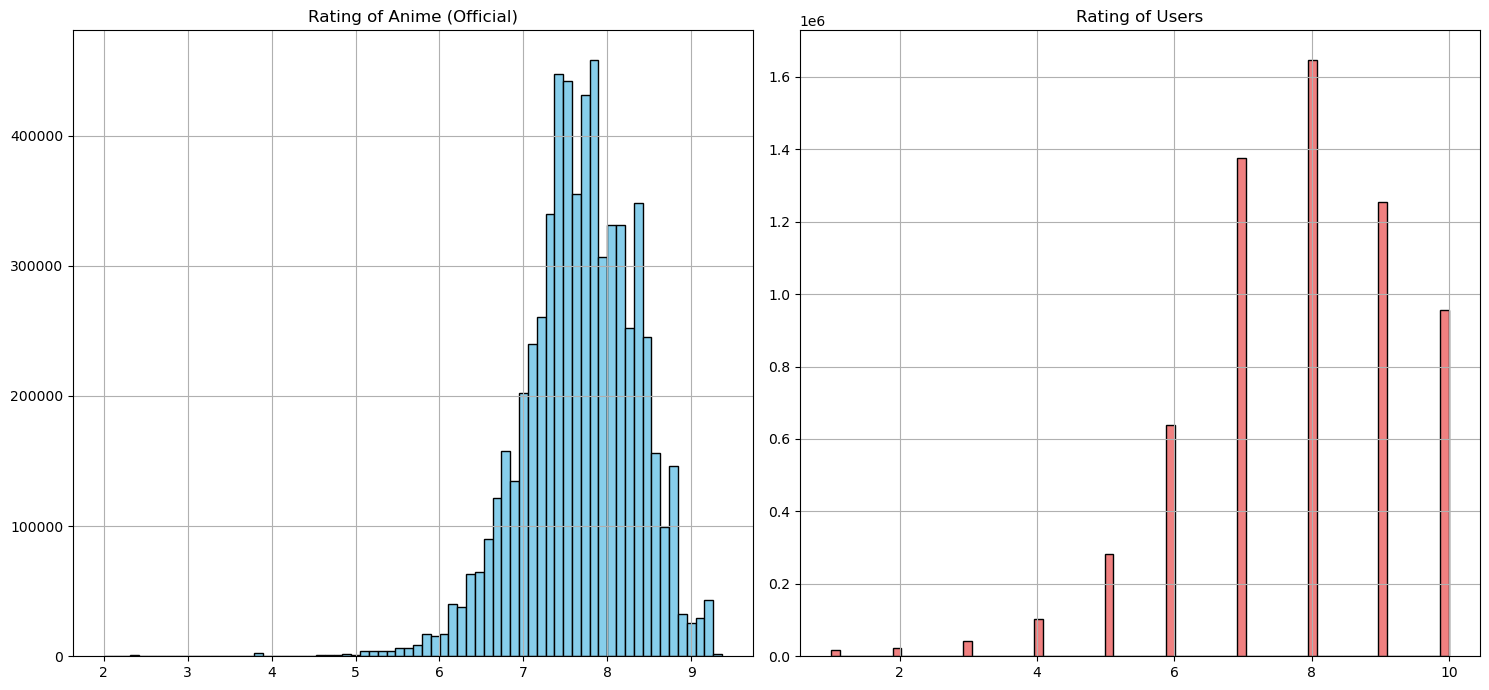

In [21]:
# Filter out user ratings that are -1 (not rated)
anime_fulldata = anime_full_dataset[anime_full_dataset['user_rating'] != -1]

plt.figure(figsize=(15, 7))

# Subplot 1: Anime official ratings
plt.subplot(1, 2, 1)
anime_fulldata['rating'].hist(bins=70, color='skyblue', edgecolor='black')
plt.title("Rating of Anime (Official)")

# Subplot 2: User ratings
plt.subplot(1, 2, 2)
anime_fulldata['user_rating'].hist(bins=70, color='lightcoral', edgecolor='black')
plt.title("Rating of Users")

plt.tight_layout()
plt.show()


Insights:

Most of the ratings are spread between 6-10
The mode of the distribution is around 7.5-8.0
Both the distribution are left skewed

# Medium of streaming

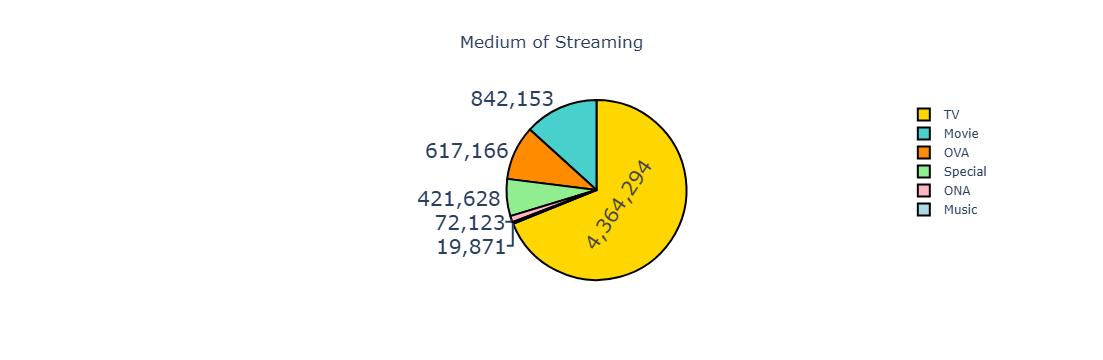

In [22]:
import plotly.graph_objects as go

# Step 1: Prepare the data
labels = anime_fulldata['type'].value_counts().index         # e.g., ['TV', 'Movie', 'OVA', ...]
values = anime_fulldata['type'].value_counts().values        # count of each type
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lightpink', 'lightblue', 'lavender']

# Step 2: Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0,  # for full pie (use 0.4 for donut)
)])

# Step 3: Customize the chart
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='#000000', width=2))
)

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Step 4: Show the chart
fig.show()


Insights:

68.9% of the anime's were aired on TV followed by 13.3% through Movie
9.74% of anime's are streamed as OVA which is greater than ONA(1.18%)

# Genre Word Cloud

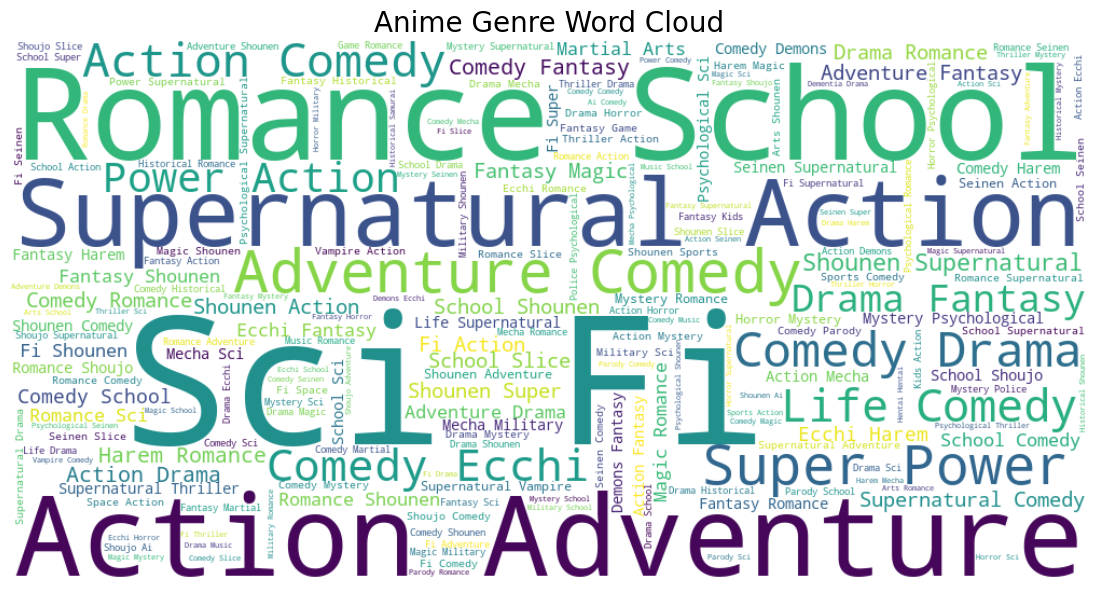

In [25]:
from wordcloud import WordCloud

# Step 1: Handle missing values
anime_fulldata['genre'] = anime_fulldata['genre'].fillna('')

# Step 2: Combine all genre strings into one big text
genre_text = ' '.join(anime_fulldata['genre'].str.replace(',', ' ').tolist())

# Step 3: Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(genre_text)

# Step 4: Display it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Anime Genre Word Cloud", fontsize=20)
plt.show()


# a) Checking for the missing values

In [28]:
# Step 1: Create a copy of the full dataset
anime_feature = anime_fulldata.copy()

# Step 2: Replace user_rating = -1 with NaN
anime_feature["user_rating"].replace({-1: np.nan}, inplace=True)

# Step 3: Drop rows where user_rating is NaN
anime_feature.dropna(subset=["user_rating"], inplace=True)

# Drop rows where anime rating is also NaN
anime_feature.dropna(subset=["rating"], inplace=True)

# Step 4: Reset index after dropping
anime_feature.reset_index(drop=True, inplace=True)

# Step 5: Check cleaned data
anime_feature.head()


anime_id     anime_title                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  
0        1    9.37   200630       99            5  
1        1    9.37   200630      152           10  
2        1    9.37   200630      244           10  
3        1    9.37   200630      271           10  
4        1    9.37   200630      322           10

In [29]:
# Show count of null values in each column
anime_feature.isnull().sum()

anime_id       0
anime_title    0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

# b) Filtering user_id

In [32]:
# Step 1: Count the number of ratings per user
user_rating_counts = anime_feature['user_id'].value_counts()
user_rating_counts

user_id
42635    3747
53698    2905
57620    2689
59643    2632
51693    2621
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: count, Length: 69600, dtype: int64

In [33]:
# Step 2: Select user_ids with at least 200 ratings
active_users = user_rating_counts[user_rating_counts >= 200].index

# Step 3: Filter the dataset to include only these active users
anime_filtered = anime_feature[anime_feature['user_id'].isin(active_users)]

# Step 4: Reset index
anime_filtered.reset_index(drop=True, inplace=True)

# Step 5: Preview the cleaned and filtered data
print("Shape after filtering:", anime_filtered.shape)
anime_filtered.head()

Shape after filtering: (3179772, 9)


anime_id     anime_title                                 genre   type  \
0     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
1     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
2     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
3     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
4     32281  Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   

  episodes  rating  members  user_id  user_rating  
0        1    9.37   200630      244           10  
1        1    9.37   200630      271           10  
2        1    9.37   200630      462            8  
3        1    9.37   200630      598           10  
4        1    9.37   200630      784            9

### Creating a user-item matrix, also known as a pivot table. This pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity !

In [35]:
anime_pivot = anime_feature.pivot_table(index='anime_title', columns='user_id', values='user_rating').fillna(0)
anime_pivot.head()

user_id                                             1      2      3      \
anime_title                                                               
&quot;0&quot;                                         0.0    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0    0.0   

user_id                                             5      7      8      \
anime_title                                                               
&quot;0&quot;                                         0.0    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0    0.0   

user_id                                             9      10     11     \
anime_title                                                               
&quot;0&quot;                                         0.0    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0    0.0   

user_id                                             12     ...  73507  73508  \
anime_title                                                ...                 
&quot;0&quot;                                         0.0  ...    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0  ...    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0  ...    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0  ...    0.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0  ...    0.0    0.0   

user_id                                             73509  73510  73511  \
anime_title                                                               
&quot;0&quot;                                         0.0    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0    6.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0    0.0   

user_id                                             73512  73513  73514  \
anime_title                                                               
&quot;0&quot;                                         0.0    0.0    0.0   
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Memoire                    0.0    0.0    0.0   
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0    0.0   

user_id                                             73515  73516  
anime_title                                                       
&quot;0&quot;                                         0.0    0.0  
&quot;Aesop&quot; no Ohanashi yori: Ushi to Kae...    0.0    0.0  
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hats...    0.0    0.0  
&quot;Bungaku Shoujo&quot; Memoire                    0.0    0.0  
&quot;Bungaku Shoujo&quot; Movie                      0.0    0.0  

[5 rows x 69600 columns]

# Collaborative Filtering

### Collaborative Filtering Using KNN (User-Based)

In [36]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Step 1: Convert the pivot table to a sparse matrix (more memory efficient)
anime_matrix = csr_matrix(anime_pivot.values)

# Step 2: Initialize the KNN model with cosine similarity
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [37]:
# Step 3: Randomly select an anime to get recommendations for
query_index = np.random.choice(anime_pivot.shape[0])
print(f"Query index selected: {query_index}")
print(f"Anime: {anime_pivot.index[query_index]}")

# Step 4: Find 6 nearest neighbors (including the anime itself)
distances, indices = model_knn.kneighbors(
    anime_pivot.iloc[query_index, :].values.reshape(1, -1), 
    n_neighbors=6
)

Query index selected: 9885
Anime: Zombie Ehon


In [38]:
# Step 5: Print recommendations
print('\nRecommendations based on Collaborative Filtering:\n')
for i in range(len(distances.flatten())):
    if i == 0:
        print(f"Input Anime: {anime_pivot.index[query_index]}\n")
    else:
        print(f"{i}: {anime_pivot.index[indices.flatten()[i]]} (distance: {distances.flatten()[i]:.4f})")



Recommendations based on Collaborative Filtering:

Input Anime: Zombie Ehon

1: Taku Boda (distance: 0.0000)
2: Kutsuya to Kobito (distance: 0.0000)
3: Tanoshii Sansuu (distance: 0.0000)
4: TeNiOE (distance: 0.0000)
5: Tao Hua Yuan Ji (distance: 0.0000)


# Content-Based Filtering using Genre

### We'll clean anime names using regex to fix HTML entities and unwanted characters.

In [39]:
import re

def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', "I'", text)
    text = re.sub(r'&amp;', 'and', text)
    return text

# Apply cleaning to anime titles
anime_df['name'] = anime_df['name'].apply(text_cleaning)


# TF-IDF Vectorization on Genre

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN in genre column with empty string
anime_df['genre'] = anime_df['genre'].fillna('')

# Convert genre list to string (in case it's a list)
genres_str = anime_df['genre'].str.split(',').astype(str)

# Initialize TF-IDF Vectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode',
                      analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), stop_words='english')

# Fit and transform genre text into TF-IDF matrix
tfv_matrix = tfv.fit_transform(genres_str)

print("TF-IDF matrix shape:", tfv_matrix.shape)


TF-IDF matrix shape: (12294, 1554)


# Compute Similarity using Sigmoid Kernel

In [41]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute sigmoid similarity kernel on TF-IDF matrix
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)


# Create Index Mapping

In [42]:
# Mapping from anime name to index
indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

# Recommendation Function

In [43]:
def give_rec(title, sig=sig):
    # Get the index for the anime title
    idx = indices[title]

    # Compute similarity scores with all animes
    sig_scores = list(enumerate(sig[idx]))

    # Sort by similarity score (excluding the anime itself)
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Extract indices of the top matches
    anime_indices = [i[0] for i in sig_scores]

    # Return a DataFrame with recommendations
    return pd.DataFrame({
        'Anime Name': anime_df['name'].iloc[anime_indices].values,
        'Rating': anime_df['rating'].iloc[anime_indices].values,
        'Genre': anime_df['genre'].iloc[anime_indices].values
    })


# Trying Out Some Recommendations

In [45]:
give_rec('Naruto: Shippuuden')

Anime Name  Rating  \
0                                 Naruto: Shippuuden    7.94   
1                                             Naruto    7.81   
2  Boruto: Naruto the Movie - Naruto ga Hokage ni...    7.68   
3                                        Naruto x UT    7.58   
4        Naruto: Shippuuden Movie 4 - The Lost Tower    7.53   
5  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...    7.50   
6               Naruto Shippuuden: Sunny Side Battle    7.26   
7  Naruto Soyokazeden Movie: Naruto to Mashin to ...    7.11   
8                      Battle Spirits: Ryuuko no Ken    4.89   
9                            Kyutai Panic Adventure!    5.21   

                                               Genre  
0  Action, Comedy, Martial Arts, Shounen, Super P...  
1  Action, Comedy, Martial Arts, Shounen, Super P...  
2  Action, Comedy, Martial Arts, Shounen, Super P...  
3  Action, Comedy, Martial Arts, Shounen, Super P...  
4  Action, Comedy, Martial Arts, Shounen, Super P...  
5  Action, Comedy, Martial Arts, Shounen, Super P...  
6  Action, Comedy, Martial Arts, Shounen, Super P...  
7  Action, Comedy, Martial Arts, Shounen, Super P...  
8              Action, Comedy, Martial Arts, Shounen  
9         Action, Martial Arts, Shounen, Super Power

In [46]:
give_rec('Steins;Gate')

Anime Name  Rating  \
0         Steins;Gate Movie: Fuka Ryouiki no Déjà vu    8.61   
1              Steins;Gate: Oukoubakko no Poriomania    8.46   
2  Steins;Gate: Kyoukaimenjou no Missing Link - D...    8.34   
3                                      Steins;Gate 0     NaN   
4                                      Under the Dog    6.55   
5                                       Loups=Garous    6.43   
6                                 Loups=Garous Pilot    5.87   
7                                        Ibara no Ou    7.24   
8           Arve Rezzle: Kikaijikake no Yousei-tachi    6.44   
9                                    Higashi no Eden    8.03   

                                               Genre  
0                                   Sci-Fi, Thriller  
1                                   Sci-Fi, Thriller  
2                                   Sci-Fi, Thriller  
3                                   Sci-Fi, Thriller  
4                           Action, Sci-Fi, Thriller  
5                          Mystery, Sci-Fi, Thriller  
6                          Mystery, Sci-Fi, Thriller  
7                  Action, Mystery, Sci-Fi, Thriller  
8           Action, Drama, Mystery, Sci-Fi, Thriller  
9  Action, Comedy, Drama, Mystery, Romance, Sci-F...

In [47]:
give_rec('Shingeki no Kyojin')

Anime Name  Rating  \
0                             Shingeki no Kyojin OVA    7.88   
1       Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa    7.75   
2        Shingeki no Kyojin Movie 1: Guren no Yumiya    7.70   
3                    Shingeki no Kyojin: Ano Hi Kara    6.96   
4                        Shingeki no Kyojin Season 2     NaN   
5                                          One Piece    8.58   
6  One Piece: Episode of Merry - Mou Hitori no Na...    8.29   
7  One Piece: Episode of Nami - Koukaishi no Nami...    8.27   
8  One Piece: Episode of Sabo - 3 Kyoudai no Kizu...    7.78   
9                               Dragon Ball Specials    6.96   

                                               Genre  
0       Action, Drama, Fantasy, Shounen, Super Power  
1       Action, Drama, Fantasy, Shounen, Super Power  
2       Action, Drama, Fantasy, Shounen, Super Power  
3       Action, Drama, Fantasy, Shounen, Super Power  
4       Action, Drama, Fantasy, Shounen, Super Power  
5  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
6  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
7  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
8  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
9              Comedy, Fantasy, Shounen, Super Power

In [48]:
give_rec('One Piece')

Anime Name  Rating  \
0  One Piece: Episode of Merry - Mou Hitori no Na...    8.29   
1  One Piece: Episode of Nami - Koukaishi no Nami...    8.27   
2  One Piece: Episode of Sabo - 3 Kyoudai no Kizu...    7.78   
3                       One Piece Film: Strong World    8.42   
4                                  One Piece Film: Z    8.39   
5                               One Piece Film: Gold    8.32   
6                           One Piece: Heart of Gold    7.75   
7                                   Digimon Frontier    7.25   
8                                     Digimon Tamers    7.65   
9                                     Digimon Savers    7.10   

                                               Genre  
0  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
1  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
2  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
3  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
4  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
5  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
6  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
7  Action, Adventure, Comedy, Drama, Fantasy, Sho...  
8         Adventure, Comedy, Drama, Fantasy, Shounen  
9         Adventure, Comedy, Drama, Fantasy, Shounen

In [49]:
give_rec('Dragon Ball Z')

Anime Name  Rating  \
0                             Dragon Ball Kai (2014)    8.01   
1                                    Dragon Ball Kai    7.95   
2              Dragon Ball Z Movie 15: Fukkatsu no F    7.55   
3                                  Dragon Ball Super    7.40   
4             Dragon Ball Z: Summer Vacation Special    7.05   
5               Dragon Ball Z: Atsumare! Gokuu World    6.76   
6  Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...    6.75   
7  Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...    6.28   
8                                        Dragon Ball    8.16   
9               Dragon Ball Z Movie 14: Kami to Kami    7.62   

                                               Genre  
0  Action, Adventure, Comedy, Fantasy, Martial Ar...  
1  Action, Adventure, Comedy, Fantasy, Martial Ar...  
2  Action, Adventure, Comedy, Fantasy, Martial Ar...  
3  Action, Adventure, Comedy, Fantasy, Martial Ar...  
4  Action, Adventure, Comedy, Fantasy, Martial Ar...  
5  Action, Adventure, Comedy, Fantasy, Martial Ar...  
6  Action, Adventure, Comedy, Fantasy, Martial Ar...  
7  Action, Adventure, Comedy, Fantasy, Martial Ar...  
8  Adventure, Comedy, Fantasy, Martial Arts, Shou...  
9  Action, Adventure, Fantasy, Martial Arts, Shou...